<a href="https://colab.research.google.com/github/lakshyarawat29/hello-world/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the Dataset

In [19]:
from google.colab import files
uploaded = files.upload()
file_name = 'student-mat.csv'
df = pd.read_csv(file_name,sep=';')

Saving student-mat.csv to student-mat (2).csv


Understanding the Data

In [20]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

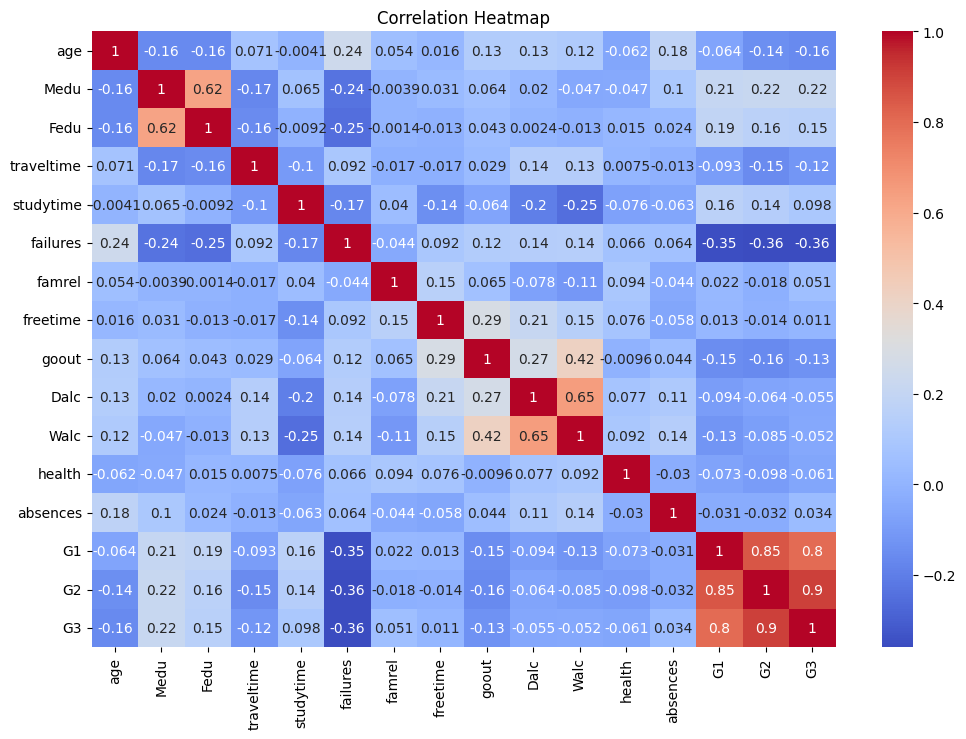

In [23]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df = pd.get_dummies(df,drop_first=True)
X=df.drop(columns=['G3'])
y=df['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Train the Model

In [25]:
model = LinearRegression()
model.fit(X_train,y_train);
print("Model Coefficients: ",model.coef_);
print("Intercept: ",model.intercept_);

Model Coefficients:  [-0.11592662  0.08631677 -0.16737768  0.08859282 -0.00774276 -0.28578115
  0.31496242 -0.02022574  0.18985939 -0.18550918  0.05390572  0.04402694
  0.05559269  0.2116987   0.95777208  0.09381411  0.3744096   0.08261237
 -0.00877173 -0.14039393 -0.4632439  -0.23719518 -0.0516432   0.09915197
  0.4812421   0.20644054 -0.29476201 -0.06829101 -0.61190072  0.30497262
 -0.22169394  0.09530352 -0.1492908   0.78565167  0.20365619  0.06722228
 -0.51749961 -0.23686146  0.3753768  -0.16820426 -0.39035251]
Intercept:  -1.9970238353909675


Testing the model trained:

In [26]:
y_pred = model.predict(X_test);
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred);

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Root Mean Squared Error: 2.3783697847961367
R² Score: 0.7241341236974022


Visualize it onto grpahs and stuff

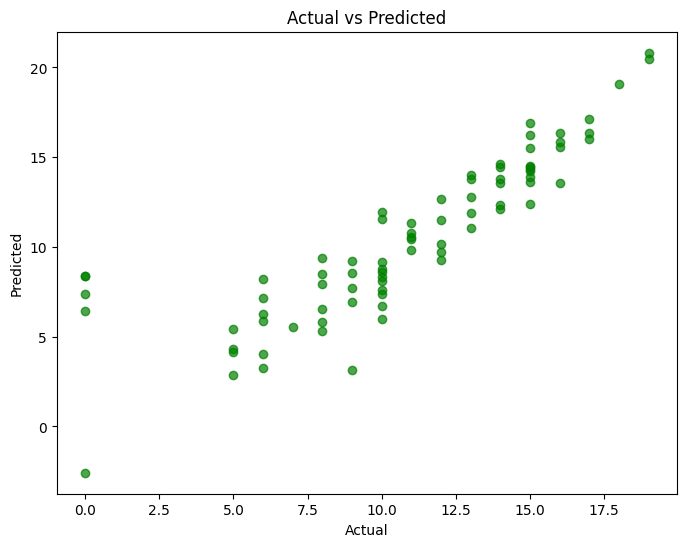

In [27]:
plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred,alpha=0.7,color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [28]:
# Calculate percentage accuracy
tolerance = 0.10  # 10% tolerance
accurate_predictions = (abs(y_pred - y_test) <= tolerance * y_test).sum()
accuracy_percentage = (accurate_predictions / len(y_test)) * 100

print(f"Accuracy within 10% tolerance: {accuracy_percentage:.2f}%")


Accuracy within 10% tolerance: 49.37%
